<a href="https://colab.research.google.com/github/P-Faria/LComp-TP/blob/main/Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisões de Python e grafos

Um grafo *orientado* e *não pesado* é um par $(V,E)$ onde $V$ é um conjunto finito de vértices e $E$ uma relação binária em $V$, o conjunto de *arcos* ou *arestas* do grafo.

Um grafo *não pesado* pode ser representado usando *listas de adjacências*. Em Python é
possível implementar as ditas usando um dicionário de listas, onde a cada vértice temos associada a sua lista
de adjacentes (vértices directamente ligados através de uma aresta).

Se o grafo for também *não orientado* bastará desdobrar cada aresta em duas adjacências.

Por exemplo, o grafo

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/320px-6n-graf.svg.png" width=200/>


pode ser armazenado no dicionário `adj` da seguinte forma.

In [2]:
adj = {1:[2,5],2:[1,3,5],3:[2,4],4:[3,5,6],5:[1,2,4],6:[4]}

### Exercício 1
Defina uma função `count_edges` que conta o número de arestas de um grafo representado desta forma.

In [3]:
def count_edges(g):
    r=0
    for v in g:
      r+=len(g[v])
    return r//2

count_edges(adj)

7

Existem muitos algoritmos para analisar grafos. Um exemplo, é o seguinte algoritmo que calcula a *distância* entre
cada par de vértices de um grafo *não pesado*. A distância entre dois vértices é o comprimento do caminho mais curto
entre eles. A função `all_pairs_shortest_paths` devolve todas as distâncias usando um dicionário de dicionários de 
distâncias (no fundo uma matriz de distâncias).

In [4]:
def all_pairs_shortest_paths(adj):
    dist = {}
    for o in adj:
        dist[o] = {}
        for d in adj:
            if o == d:
                dist[o][d] = 0
            else:
                dist[o][d] = float("inf")
        for d in adj[o]:
                dist[o][d] = 1
    for k in adj:
        for o in adj:
            for d in adj:
                if dist[o][d] > dist[o][k] + dist[k][d]:
                    dist[o][d] = dist[o][k] + dist[k][d]
    return dist

all_pairs_shortest_paths(adj)

{1: {1: 0, 2: 1, 3: 2, 4: 2, 5: 1, 6: 3},
 2: {1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 3},
 3: {1: 2, 2: 1, 3: 0, 4: 1, 5: 2, 6: 2},
 4: {1: 2, 2: 2, 3: 1, 4: 0, 5: 1, 6: 1},
 5: {1: 1, 2: 1, 3: 2, 4: 1, 5: 0, 6: 2},
 6: {1: 3, 2: 3, 3: 2, 4: 1, 5: 2, 6: 0}}

### Exercício 2
O *diâmetro* de um grafo é a distância entre os seus vértices mais afastados. Defina a função `diameter` que calcula o
diâmetro de um grafo, tirando proveito da função `all_pairs_shortest_paths`.

In [8]:
def diameter(adj):
    d = all_pairs_shortest_paths(adj)
    r=0
    for s in d:
      for t in d[s]:
        r=max(r,d[s][t])
    return r
    
diameter(adj)

3

## Biblioteca `NetworkX` para manipulação de grafos.

A biblioteca `NetworkX` diponibiliza implementações de vários tipos de grafos e de muitos algoritmos para os analisar e visualizar. Para importar esta biblioteca de forma qualificada faz-se o seguinte.

In [5]:
import networkx as nx

O tutorial desta biblioteca pode ser encontrado em https://networkx.github.io/documentation/stable/tutorial.html.

### Exercício 3
Implemente uma função `converte` que converte um grafo implementando com  dicionários do python para um grafo do `NetworkX`.

In [9]:
def converte(adj):
    g=nx.Graph()
    for v in adj:
      g.add_node(v)
      for u in adj[v]:
        g.add_edge(v,u)
    return g

graph = converte(adj)
nx.to_dict_of_lists(graph) # converte o grafo para um dicionário de listas

{1: [2, 5], 2: [1, 3, 5], 3: [2, 4], 4: [3, 5, 6], 5: [1, 2, 4], 6: [4]}

Como referido acima, a vantagem de usar a biblioteca `NetworkX` é que os algoritmos de análise mais usais estão todos já implementados. Por exemplo, para calcular o diâmetro do grafo exemplo basta fazer o seguinte.

In [10]:
nx.diameter(graph)

3

### Exercício 4
Utilize a biblioteca `NetworkX` para desenhar o grafo exemplo, conforme explicado em https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs.

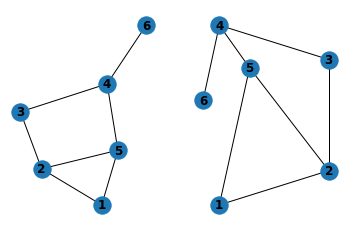

In [11]:
import matplotlib.pyplot as plt

G=converte(adj)
subax1 = plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')

subax2 = plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

### Exercício 5
A biblioteca `NetworkX` disponibiliza também vários geradores de grafos pré-definidos, coforme documentação em https://networkx.github.io/documentation/stable/reference/generators.html.
    Use esses geradores para criar um grafo degenerado que é um ciclo com 100 vértices. 
    Desenhe esse grafo e calcule o seu diâmetro 
    (que deverá ser 50).

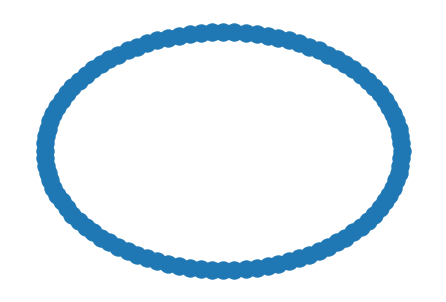

In [14]:
ciclo = nx.cycle_graph(100)
nx.draw(ciclo,pos=nx.circular_layout(ciclo))


## Representação de circuitos com bi-grafos

Um circuito booleano pode ser representado por um bi-grafo (i.e., um grafo bipartido com dois tipos de nodos, em que os arcos só podem ligar nodos de tipos diferentes), orientado e acíclico. 
Neste caso temos nodos do tipo *gate* e nodos do tipo *wire*.
Cada *gate* tem grau de saida igual a 1, e cada *wire* tem grau de entrada menor ou igual a 1. Os *inputs* são os nodos do tipo *wire* de grau de entrada 0. Os
*outputs* são os nodos do tipo *wire* de grau de saída 0.


Por exemplo, o seguinte circuito booleano com 2 *inputs* e 1 *output* tem uma *gate* NOR e uma *gate* AND e calcula a expressão $Q = A \wedge \neg (A \vee B)$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/CPT-logic-gate_ex4.svg/291px-CPT-logic-gate_ex4.svg.png"/>

Para representar este circuito com um grafo `NetworkX` podemos começar por criar um grafo orientado com o método ``DiGraph``, criar um nó por cada *wire* e por cada *gate* , e distinguir estes últimos usando um atributo que indica qual o tipo de *gate*. Note que para o circuito acima será necessário criar um nó para o fio que liga a *gate* NOR à *gate* AND. O código seguinte implementa esta ideia.

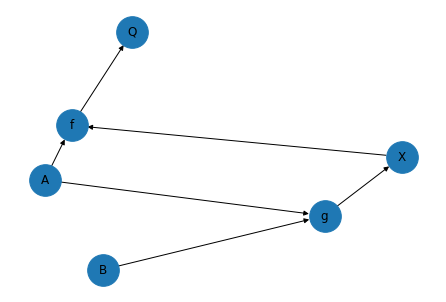

In [17]:
circuit = nx.DiGraph()
circuit.add_node("A")
circuit.add_node("B")
circuit.add_node("Q")
circuit.add_node("X")
circuit.add_node("f",gate="AND")
circuit.add_node("g",gate="NOR")
circuit.add_edge("A","g")
circuit.add_edge("A","f")
circuit.add_edge("B","g")
circuit.add_edge("g","X")
circuit.add_edge("X","f")
circuit.add_edge("f","Q")
nx.draw(circuit,with_labels=True,node_size=1000)

### Exercício 6

Defina a função `inputs` que, dado um circuito representado como um `DiGraph` usando a convenção acima, devolve uma lista com todos os fios que são input do mesmo (as *sources* do grafo, nós sem arestas de entrada). Note que pode usar a expressão ``g.nodes[n]`` para aceder ao dicionário de atributos do nó ``n`` do grafo ``g``.

In [22]:
def inputs(circ):
  return [v for v in circ if 'gate' not in circ.nodes[v] and circ.in_degree(v)==0]

inputs(circuit)

['A', 'B']

---
g.in_edges(v) => lista de vertices que  chegam a v

g.in_degree(v) => apagou

---


### Exercício 7

Defina a função `desenha` que desenha um circuito representado como um `DiGraph` usando a convenção acima. Tente desenhar os nós correspondentes aos *wires* com uma cor diferente dos das *gates*, e no caso destas tente também identificar qual é a gate.

In [ ]:
def desenha(circ):
  nx.draw(circ,with_labels=True,labels=)

desenha(circuit)

### Exercício 8

Defina a função `valida` que testa se um `DiGraph` é um circuito válido, nomeadamente:
- Tem que ser bipartido
- Tem que ser um acíclico
- Todas as *gates* têm exactamente uma saída
- Todos os *wires* têm no máximo uma entrada

In [ ]:
def valida(circ):
  # completar

valida(circuit)